In [2]:
import warnings
warnings.filterwarnings("ignore")

import sys
import os
import tarfile
import urllib

import numpy as np
import pandas as pd 


from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


**Set Variables**

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DATA_SAVE_PATH = os.path.join("datasets")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


RANDOM_STATE=48

## Data Download

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=DATA_SAVE_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [5]:
def load_housing_data(housing_path=DATA_SAVE_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

**Download Data**

In [6]:
fetch_housing_data()

In [7]:
data=load_housing_data()

In [8]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=RANDOM_STATE)

**Save Data**

In [9]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18822,-120.51,39.52,26.0,2286.0,444.0,498.0,216.0,2.0650,96100.0,INLAND
14057,-117.13,32.75,50.0,1476.0,354.0,698.0,354.0,3.0000,168800.0,NEAR OCEAN
17117,-122.16,37.48,36.0,2238.0,479.0,1949.0,457.0,2.3769,157300.0,NEAR BAY
9386,-122.45,37.90,30.0,3763.0,717.0,1292.0,632.0,8.4888,500001.0,NEAR BAY
448,-122.28,37.87,46.0,3022.0,696.0,1293.0,675.0,2.5430,220700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
14144,-117.08,32.74,33.0,3260.0,673.0,1784.0,666.0,3.5078,126500.0,NEAR OCEAN
10587,-117.77,33.69,14.0,1413.0,372.0,744.0,338.0,3.7988,184100.0,<1H OCEAN
9553,-120.64,37.38,21.0,3157.0,637.0,2268.0,620.0,2.5670,70400.0,INLAND
2611,-123.88,40.93,28.0,1272.0,259.0,519.0,220.0,3.2891,106300.0,<1H OCEAN


In [10]:
train_set.to_csv(DATA_SAVE_PATH+"/train_data.csv",index=False)

In [11]:
test_set.to_csv(DATA_SAVE_PATH+"/test_data.csv",index=False)

**Check data distribution**

In [12]:
tr=train_set["longitude"]
ts=test_set["longitude"]

In [13]:
tr.mean(),tr.median()

(-119.56884084302325, -118.5)

In [14]:
ts.mean(),ts.median()

(-119.57315891472868, -118.49)

## Prepare the data for Machine Learning algorithms

In [3]:
train=pd.read_csv("datasets/train_data.csv")
test=pd.read_csv("datasets/test_data.csv")
    


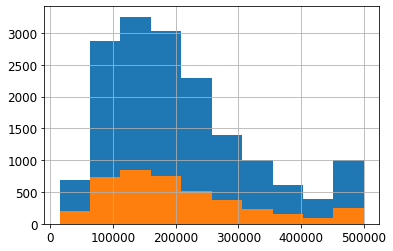

In [8]:
train["median_house_value"].hist()
test["median_house_value"].hist()

In [6]:
X_tr=train.drop("median_house_value",axis=1)
y_tr=train["median_house_value"].copy()

X_ts=test.drop("median_house_value",axis=1)
y_ts=test["median_house_value"].copy()

In [7]:
X_tr.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [9]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
#housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#housing_cat_1hot

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

#attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#housing_extra_attribs = attr_adder.transform(housing.values)

In [27]:
imputer.fit_transform(train[["total_rooms","population"]])

array([[2286.,  498.],
       [1476.,  698.],
       [2238., 1949.],
       ...,
       [3157., 2268.],
       [1272.,  519.],
       [2479., 1816.]])

In [22]:
(train.loc[:,"total_rooms"]/train.loc[:,"households"]).values

array([10.58333333,  4.16949153,  4.89715536, ...,  5.09193548,
        5.78181818,  4.99798387])

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

#housing_num_tr = num_pipeline.fit_transform(housing_num)

In [29]:
from sklearn.preprocessing import  MinMaxScaler

In [12]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_tr.drop("ocean_proximity",axis=1))
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

#housing_prepared = full_pipeline.fit_transform(housing)
X_tr_prepared = full_pipeline.fit_transform(X_tr)

https://towardsdatascience.com/understanding-lightgbm-parameters-and-how-to-tune-them-6764e20c6e5b

In [16]:
from lightgbm import LGBMRegressor

In [32]:
model=LGBMRegressor(max_depth=10,learning_rate=0.01,n_estimators=1000)

In [33]:
model.fit(X_tr_prepared,y_tr)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
model.score(X_tr_prepared,y_tr)

0.8852755247317367

In [29]:
X_ts_prepared = full_pipeline.transform(X_ts)

In [35]:
model.score(X_ts_prepared,y_ts)

0.8412185588926968